# KNN Çalışması

In [132]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [133]:
path = 'Dataset/ai4i2020.csv'
dataset = pd.read_csv(path)

Satır ve sütun sayıları gösterilmiştir.

In [134]:
print(f"Number of rows: {dataset.shape[0]}, Number of columns: {dataset.shape[1]}")

Number of rows: 10000, Number of columns: 14


Veri setine göz gezdirilmiştir.

In [135]:
dataset.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Veri setindeki sütun isimleri kolaylık olması açısından içerisindeki kısaltmalar veya birimler temizlenmiştir.

In [136]:
dataset.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)

Makinelerin id bilgilerini içeren sütunlar düşürülmüştür.

In [137]:
dataset.drop(['Product ID', 'UDI'], axis=1, inplace = True)

In [138]:
dataset.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [139]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Air temperature,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


In [140]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
 7   TWF                  10000 non-null  int64  
 8   HDF                  10000 non-null  int64  
 9   PWF                  10000 non-null  int64  
 10  OSF                  10000 non-null  int64  
 11  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


Veri setinde null değer olmadığı görülmektedir. Ayrıca type sütunu dışında object tipinde sütun olmadığı görülmüştür.

In [141]:
dataset_group = dataset.groupby(['Machine failure'])
dataset_group.count()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
Machine failure,,,,,,,,,,,
0,9661,9661,9661,9661,9661,9661,9661,9661,9661,9661,9661
1,339,339,339,339,339,339,339,339,339,339,339


## Kategorik Özellik Analizi

In [142]:
type_values = dataset["Type"].value_counts().reset_index()[:28]
type_values

,index,Type
0,L,6000
1,M,2997
2,H,1003


In [143]:
fig = px.pie(type_values, values = "Type", names = "index", title = "Tiplere göre ürünler")
fig.show()

Burada Etiketlere göre type değişkeninin bir kategorik değişken olduğu görülmüştür. 


In [144]:
dataset = pd.get_dummies(dataset,drop_first=True)
dataset.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1,0


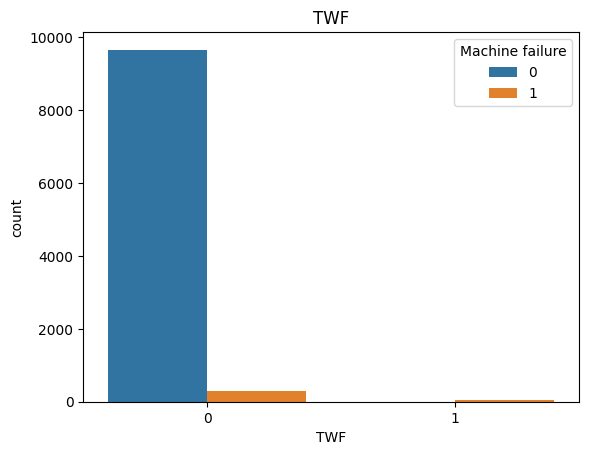

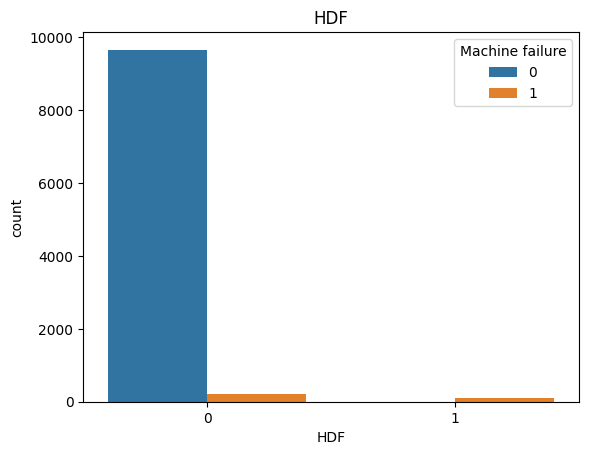

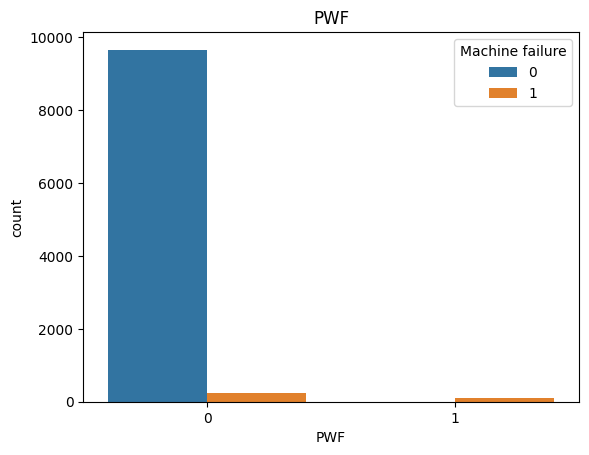

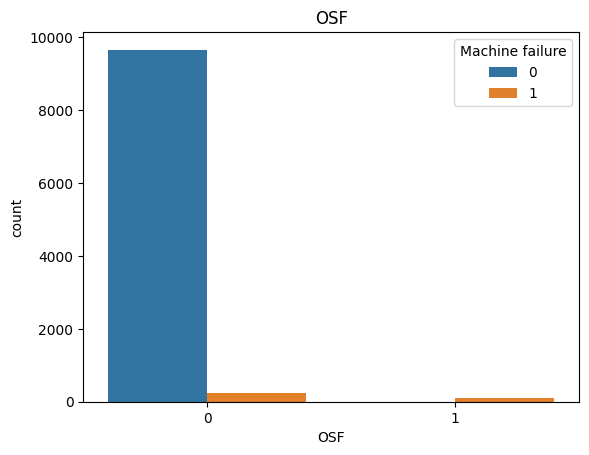

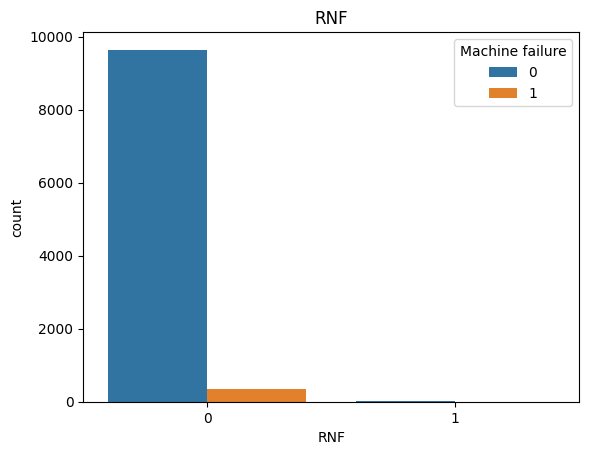

In [145]:
for column in ["TWF","HDF","PWF","OSF","RNF"]:
    plt.figure()
    sns.countplot(x = column, data = dataset, hue="Machine failure")
    plt.title(column)

In [146]:
failure_counts = 0
for column_name, row in dataset.loc[:,["TWF",	"HDF",	"PWF",	"OSF",	"RNF"]].iterrows():
  for value in row:
    if value == 1:
      failure_counts += 1
      break

print("Total Failure Type Counts: ", str(failure_counts))
print("Total Machine Failure Counts: ", str(len(dataset[dataset.loc[:,"Machine failure"] == 1])))

Total Failure Type Counts:  348
Total Machine Failure Counts:  339


In [147]:
dataset[(dataset.loc[:, "Machine failure"] == 0) & ((dataset.loc[:, "TWF"] == 1) | (dataset.loc[:, "HDF"] == 1) | (dataset.loc[:, "PWF"] == 1) | (dataset.loc[:, "OSF"] == 1) | (dataset.loc[:, "RNF"] == 1))]

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
1221,297.0,308.3,1399,46.4,132,0,0,0,0,0,1,0,1
1302,298.6,309.8,1505,45.7,144,0,0,0,0,0,1,1,0
1748,298.4,307.7,1626,31.1,166,0,0,0,0,0,1,0,0
2072,299.6,309.5,1570,35.5,189,0,0,0,0,0,1,1,0
2559,299.3,309.0,1447,50.4,140,0,0,0,0,0,1,1,0
3065,300.1,309.2,1687,27.7,95,0,0,0,0,0,1,0,1
3452,301.6,310.5,1602,32.3,2,0,0,0,0,0,1,0,0
5471,302.7,312.3,1346,61.2,170,0,0,0,0,0,1,1,0
5489,302.6,312.1,1499,35.0,215,0,0,0,0,0,1,1,0
5495,302.9,312.5,1357,55.0,12,0,0,0,0,0,1,0,0


Veri seti tekrar gözden geçirildiğinde içerisinde twf, hdf, pwf osf ve rnf sütunlarının machine failure ile beraber 1 veya 0 olduğu gözlemlenmiştir. Bu değerler oluşan hatanın türünü gösterdiği anlaşılmıştır. Bu yüzden bu sütunlar düşürülmüştür.

In [148]:
dataset.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True)

## Değişkenler arası korelasyonun incelenmesi

In [149]:
dataset.corr()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,Type_L,Type_M
Air temperature,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.006676,0.007958
Process temperature,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.005564,0.005831
Rotational speed,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.004735,-0.004296
Torque,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,0.001191,0.001991
Tool wear,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.008232,-0.006976
Machine failure,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.035643,-0.022432
Type_L,0.006676,0.005564,0.004735,0.001191,0.008232,0.035643,1.000000,-0.801211
Type_M,0.007958,0.005831,-0.004296,0.001991,-0.006976,-0.022432,-0.801211,1.000000


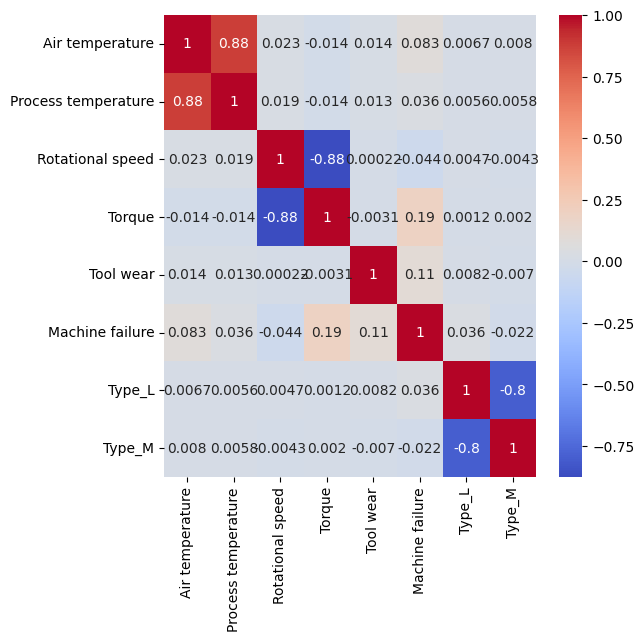

In [150]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm");

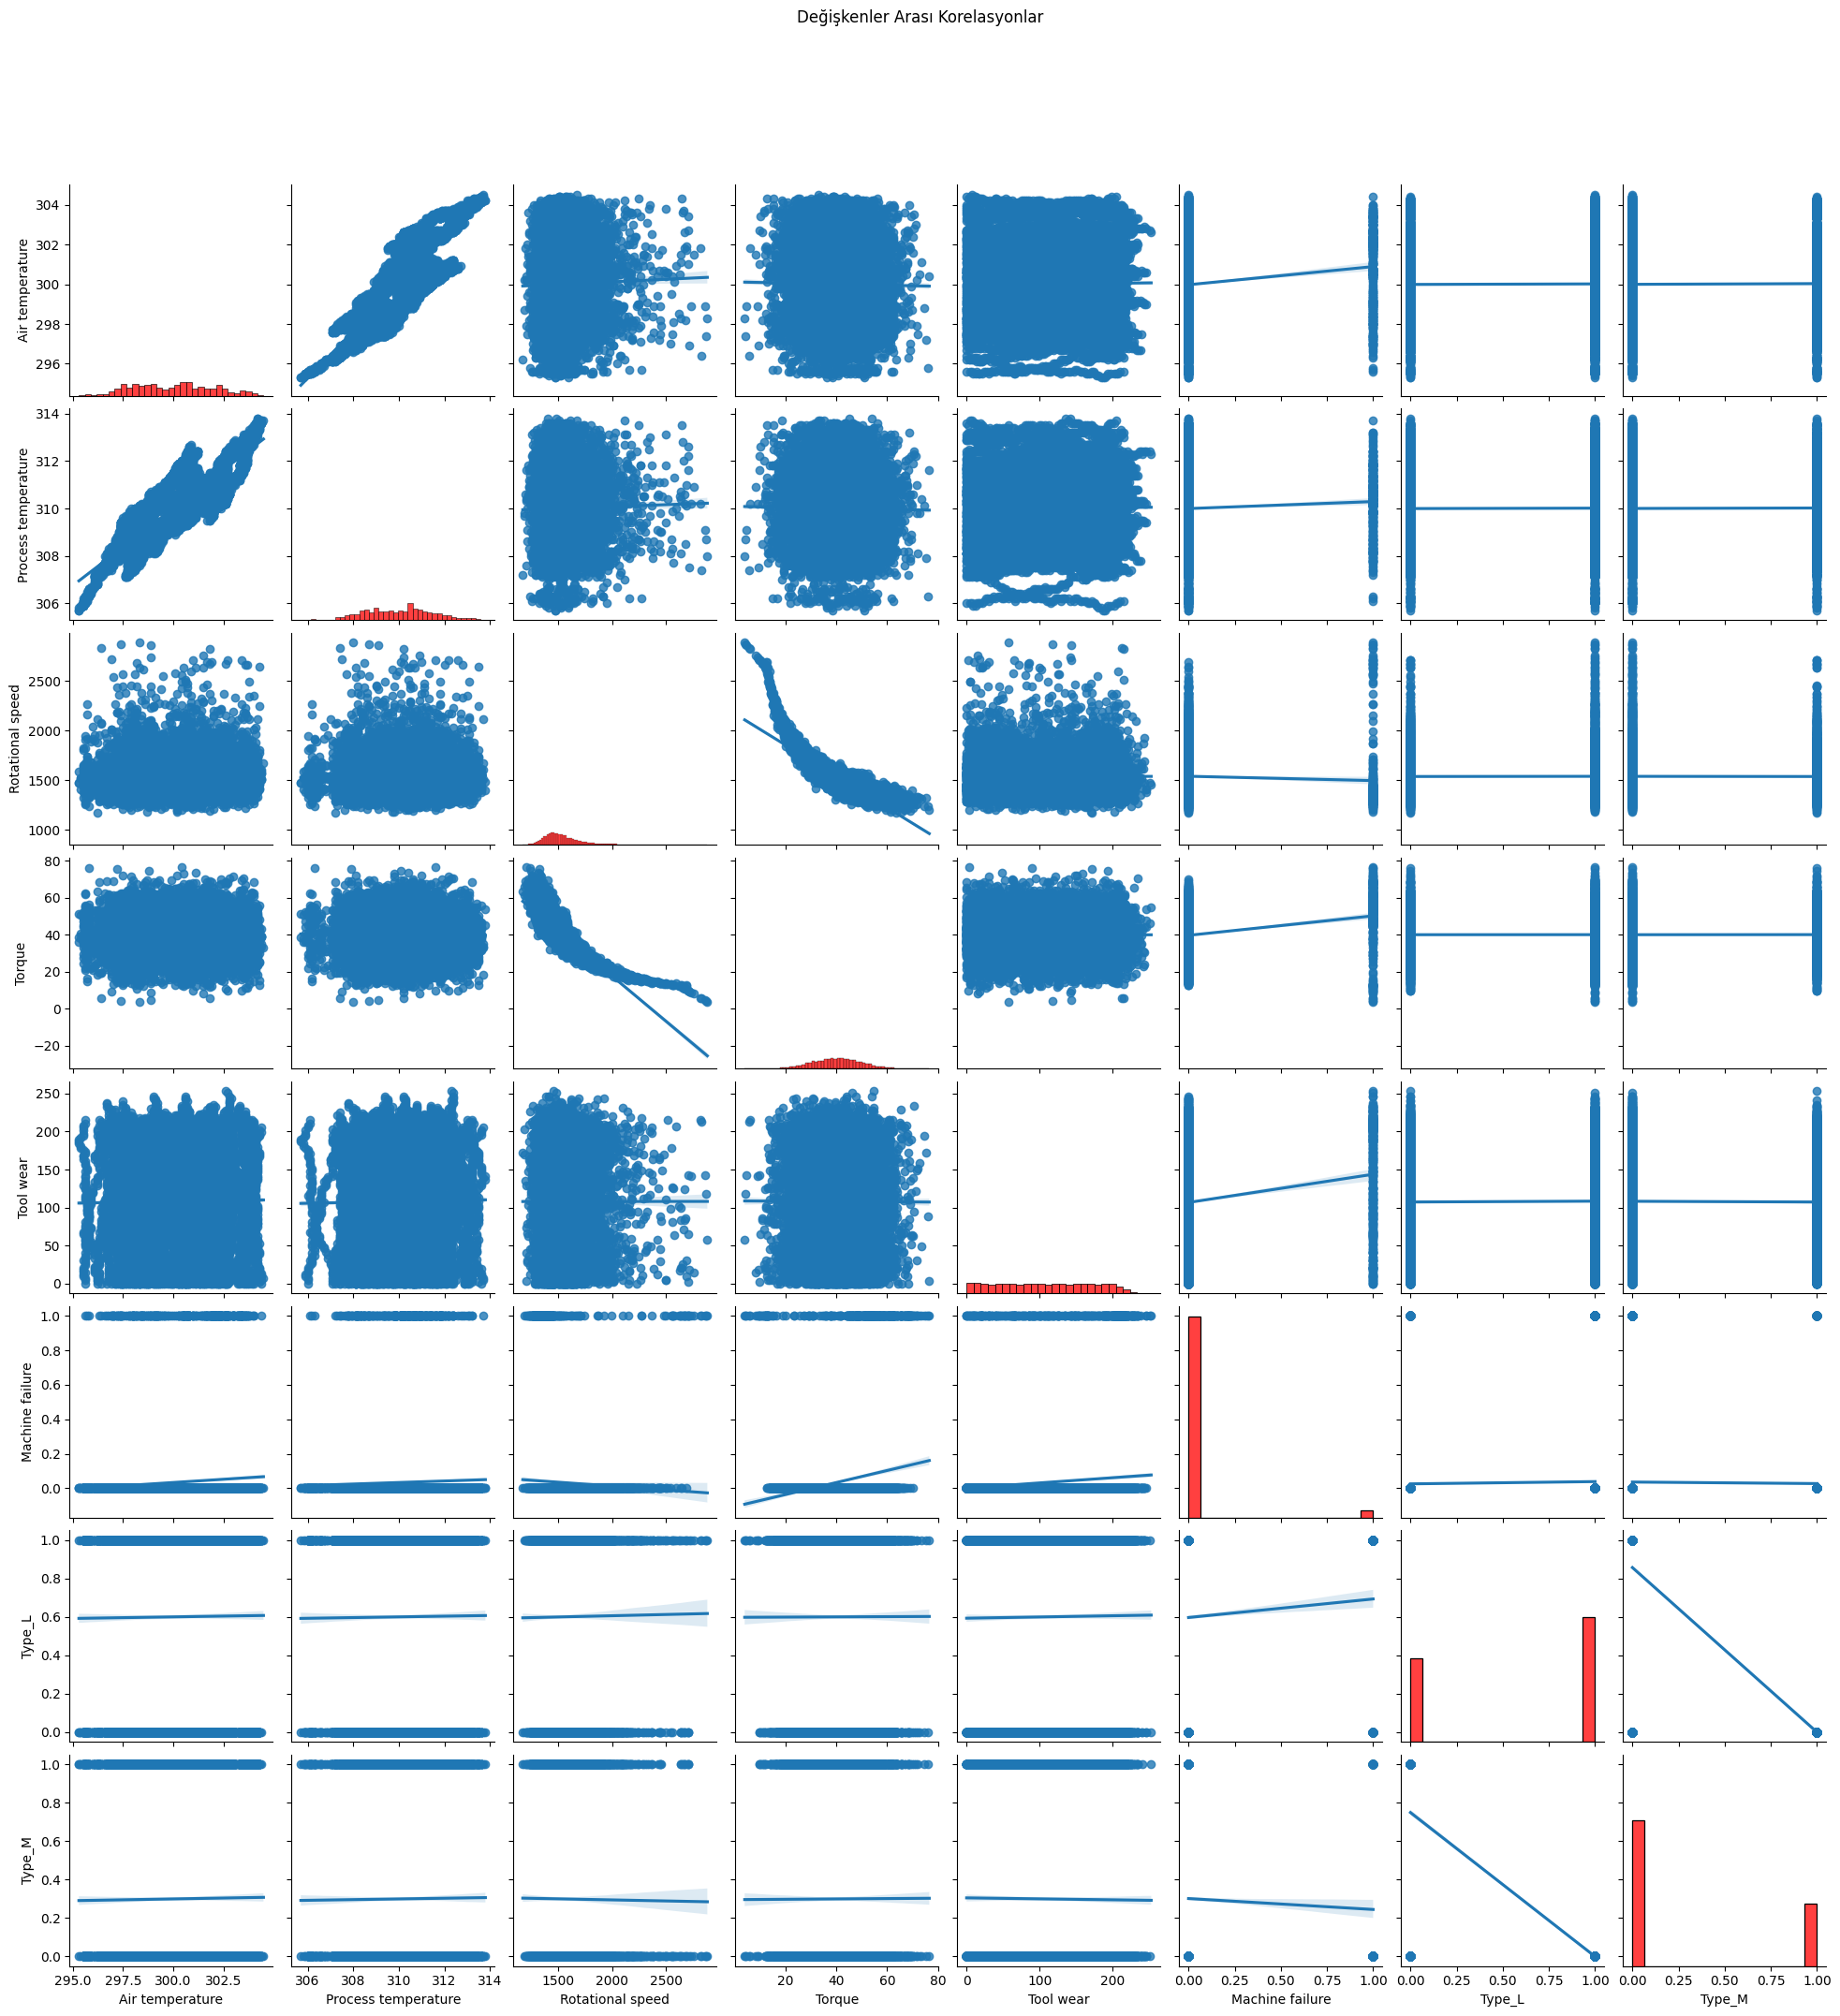

In [151]:
g= sns.pairplot(dataset ,kind="reg",diag_kws= {'color': 'red'})
g.fig.suptitle("Değişkenler Arası Korelasyonlar", y=1.08)
plt.show()

## Boxplot çizdirilmesi

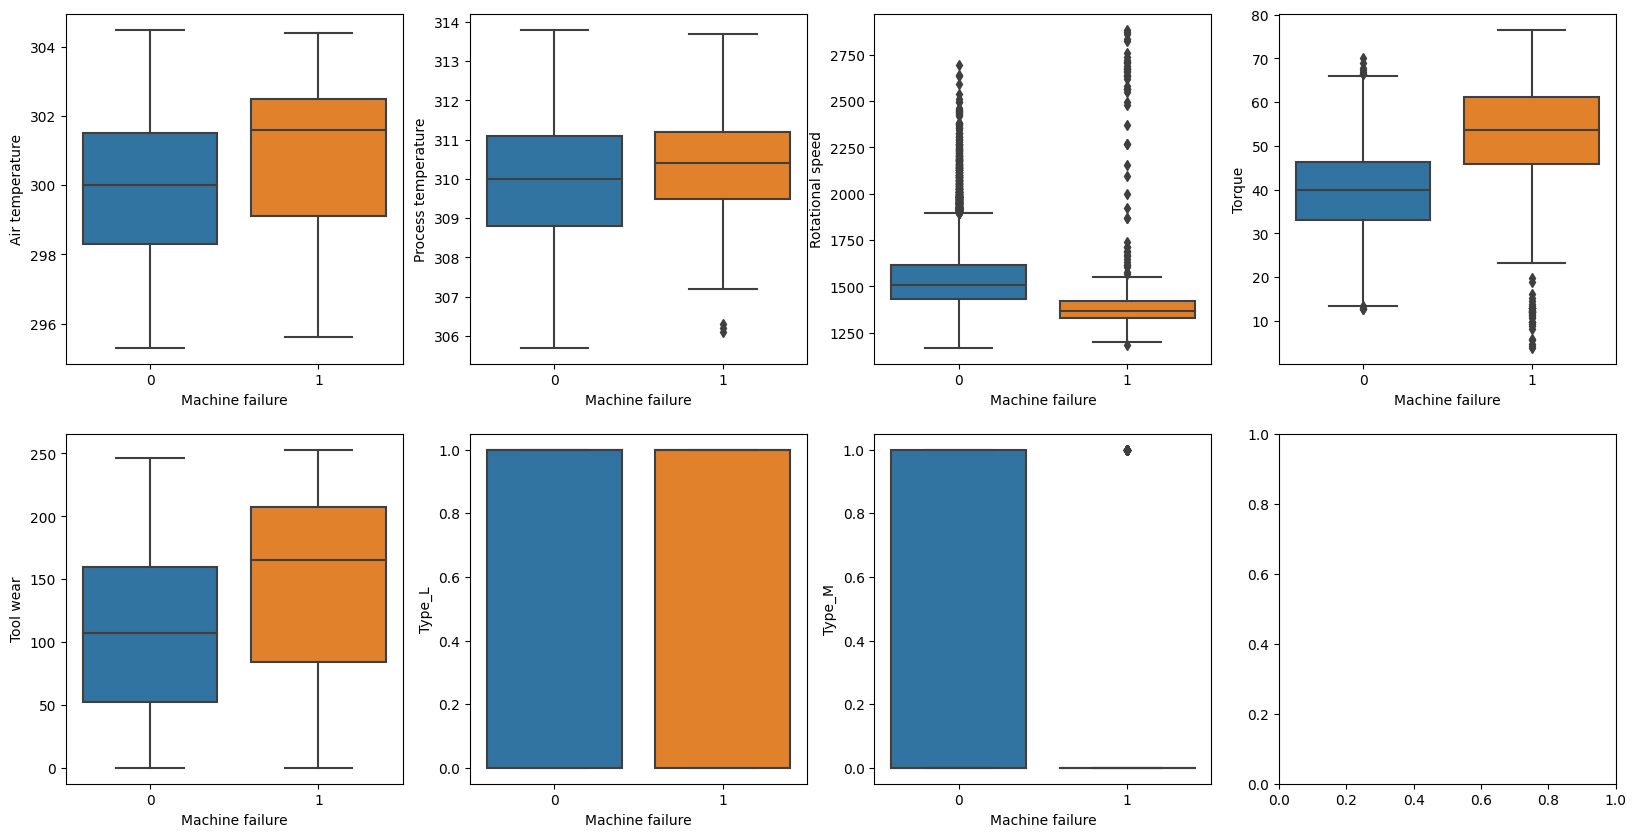

In [152]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(['Air temperature', 'Process temperature', 'Rotational speed','Torque', 'Tool wear', 'Type_L', 'Type_M']):
    sns.boxplot(x="Machine failure", y=col, data=dataset, ax=ax[i//4][i%4])

## Histogramın çizdirilmesi

In [153]:
histogram_data = dataset.groupby("Machine failure")
histogram_data.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0
50,298.9,309.1,2861,4.6,143,1,1,0
69,298.9,309.0,1410,65.7,191,1,1,0
77,298.8,308.9,1455,41.3,208,1,1,0
160,298.4,308.2,1282,60.7,216,1,1,0
161,298.3,308.1,1412,52.3,218,1,1,0


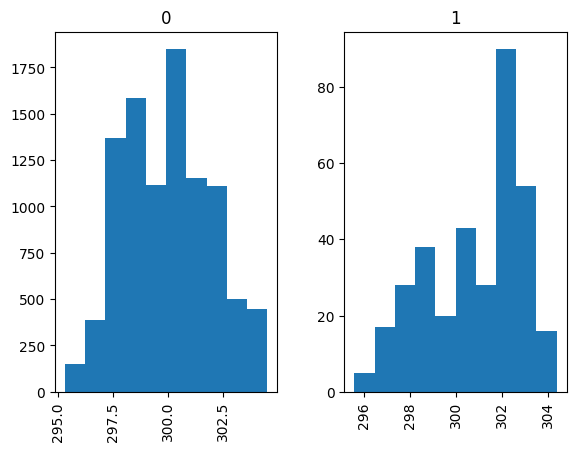

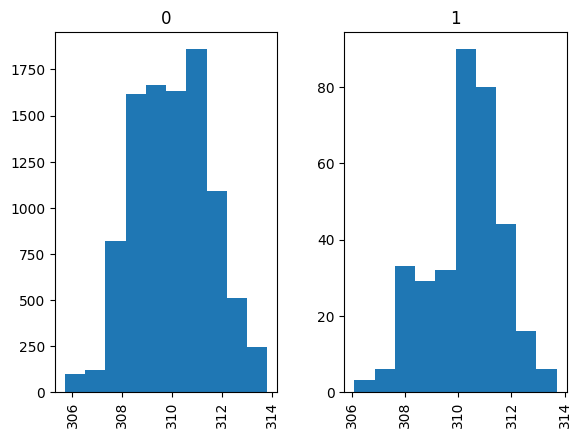

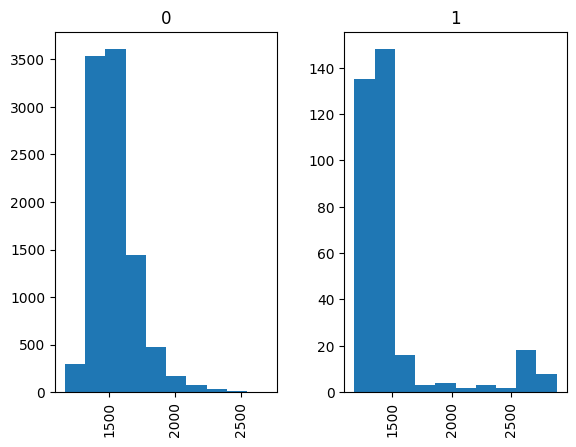

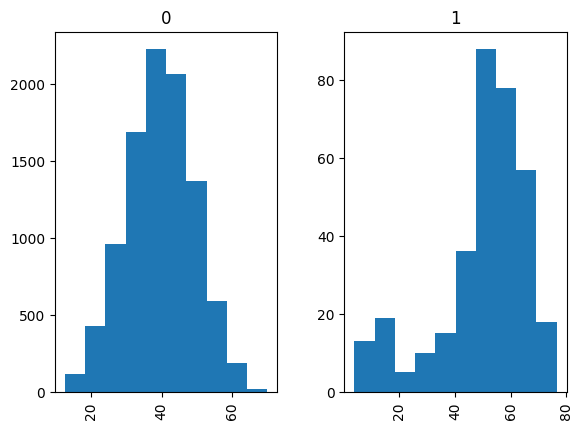

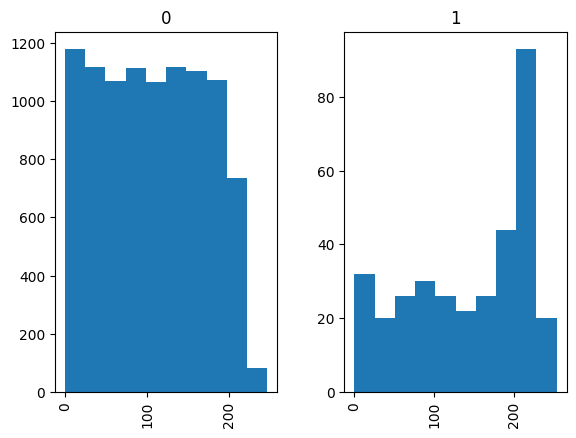

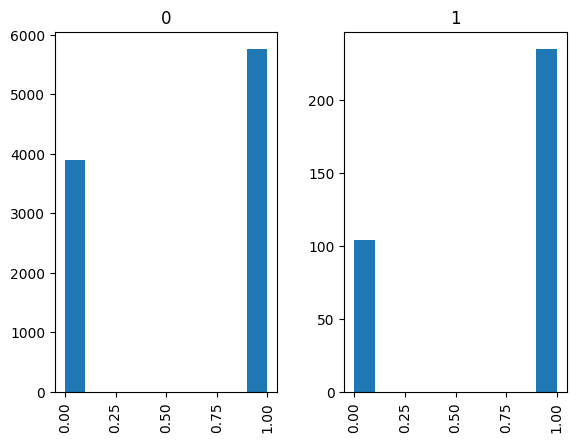

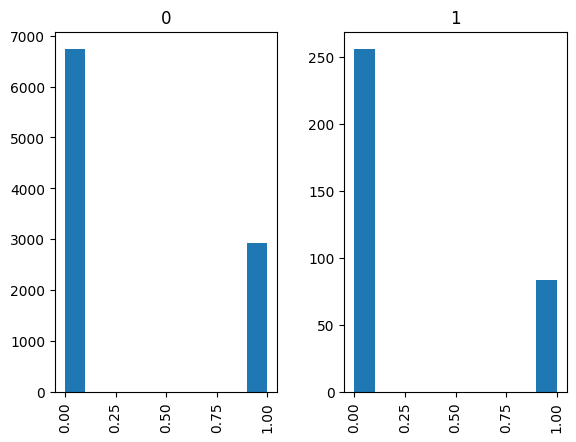

In [154]:
for i, column in enumerate(['Air temperature', 'Process temperature', 'Rotational speed','Torque', 'Tool wear', 'Type_L', 'Type_M']):
  dataset[column].hist(by=dataset["Machine failure"])

## Modelin oluşturulması

Modeliğimiz oluşturulurken voting sayısı 1,3,5,7,9 olmak üzere hepsi denenmiş ve distance içinse p = 1 ile manhattan, p = 2 ile öklid ve p = 3 için denenmiştir Bu da 5 * 3 ile 15 adet model oluşturulup metrikleri gösterilmiştir.

In [155]:
y = dataset['Machine failure']
X = dataset.drop(['Machine failure'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [156]:
X_train.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Type_L,Type_M
9069,297.2,308.2,1678,28.1,133,0,1
2603,299.3,309.2,1334,46.3,31,0,1
7738,300.5,312.0,1263,60.8,146,0,1
1579,298.3,308.3,1444,43.8,176,1,0
5058,303.9,312.9,1526,42.5,194,1,0


In [157]:
y_train.head()

9069    0
2603    0
7738    0
1579    0
5058    0
Name: Machine failure, dtype: int64

In [158]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [159]:
n_neighbors = [1,3,5,7,9]
p_numbers = [1,2,3]
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])

In [160]:
def run_model(X_train, y_train, X_test, y_test, n_neighbor, p_number, prefix=""):
    model = KNeighborsClassifier(n_neighbors=n_neighbor, p=p_number)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_test_pred)
    rec = recall_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    title = "k = " + str(n_neighbor) + ", p = " + str(p_number)

    model_performance.loc[prefix + title] = [acc, rec, prec, f1]

    print()
    print("-------------------------------------------------------")
    print(title)
    print()
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
    plt.show(block=True);
    print()
    print("Accuracy: {:.2%}".format(acc))
    print()
    print("Recall: {:.2%}".format(rec))
    print()
    print("Precision: {:.2%}".format(prec))
    print()
    print("F1 Skor: {:.2%}".format(f1))
    print()


-------------------------------------------------------
k = 1, p = 1



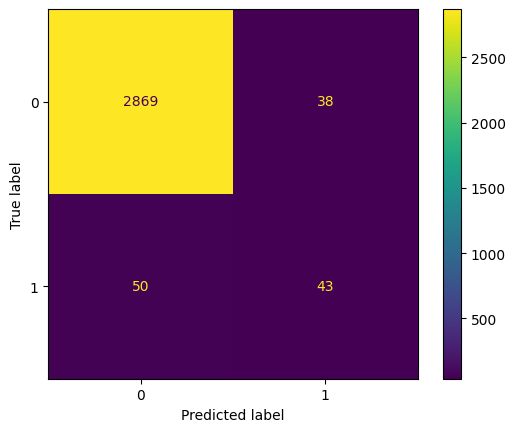


Accuracy: 97.07%

Recall: 46.24%

Precision: 53.09%

F1 Skor: 49.43%


-------------------------------------------------------
k = 1, p = 2



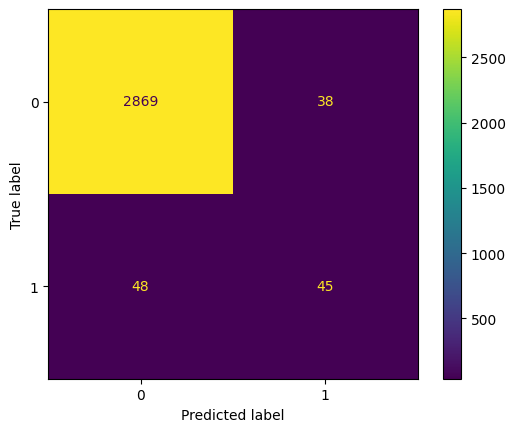


Accuracy: 97.13%

Recall: 48.39%

Precision: 54.22%

F1 Skor: 51.14%


-------------------------------------------------------
k = 1, p = 3



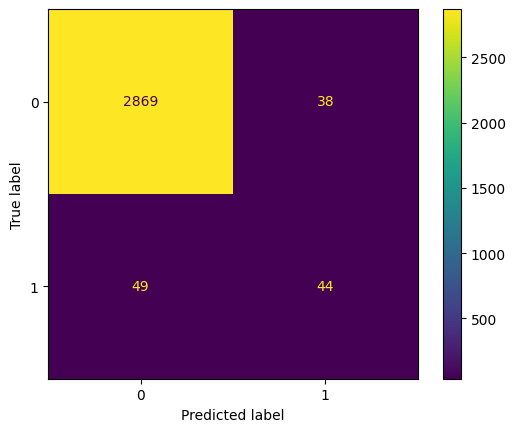


Accuracy: 97.10%

Recall: 47.31%

Precision: 53.66%

F1 Skor: 50.29%


-------------------------------------------------------
k = 3, p = 1



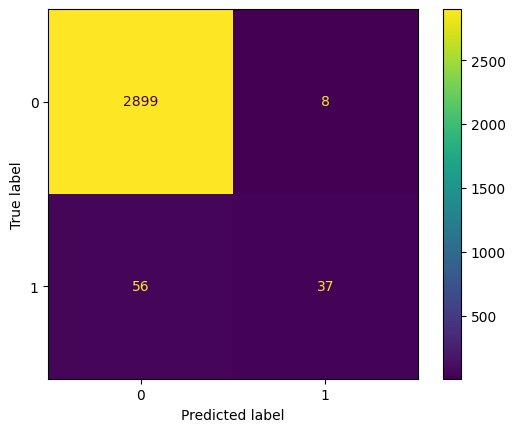


Accuracy: 97.87%

Recall: 39.78%

Precision: 82.22%

F1 Skor: 53.62%


-------------------------------------------------------
k = 3, p = 2



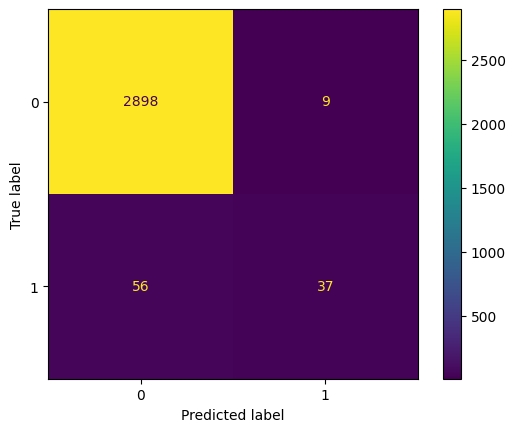


Accuracy: 97.83%

Recall: 39.78%

Precision: 80.43%

F1 Skor: 53.24%


-------------------------------------------------------
k = 3, p = 3



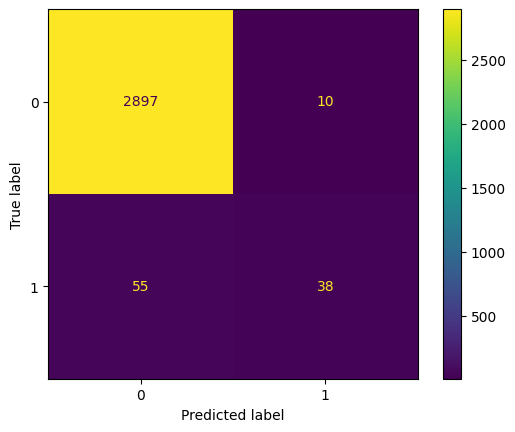


Accuracy: 97.83%

Recall: 40.86%

Precision: 79.17%

F1 Skor: 53.90%


-------------------------------------------------------
k = 5, p = 1



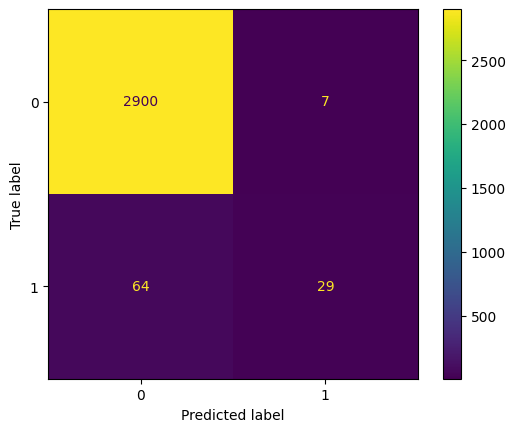


Accuracy: 97.63%

Recall: 31.18%

Precision: 80.56%

F1 Skor: 44.96%


-------------------------------------------------------
k = 5, p = 2



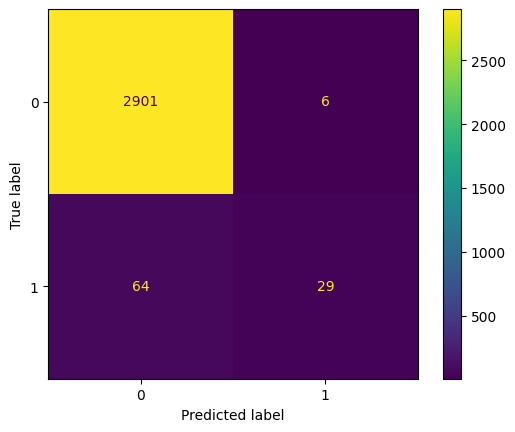


Accuracy: 97.67%

Recall: 31.18%

Precision: 82.86%

F1 Skor: 45.31%


-------------------------------------------------------
k = 5, p = 3



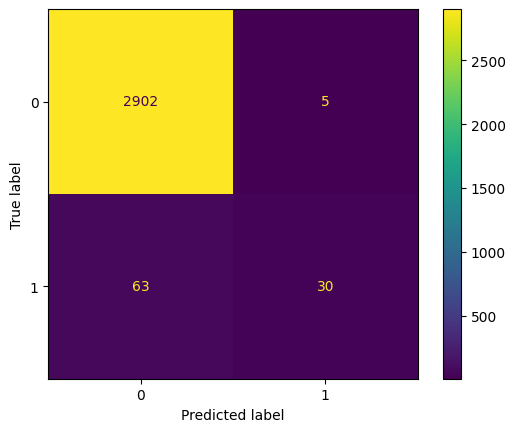


Accuracy: 97.73%

Recall: 32.26%

Precision: 85.71%

F1 Skor: 46.87%


-------------------------------------------------------
k = 7, p = 1



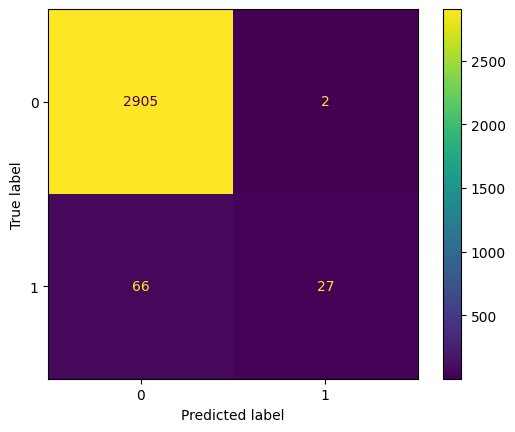


Accuracy: 97.73%

Recall: 29.03%

Precision: 93.10%

F1 Skor: 44.26%


-------------------------------------------------------
k = 7, p = 2



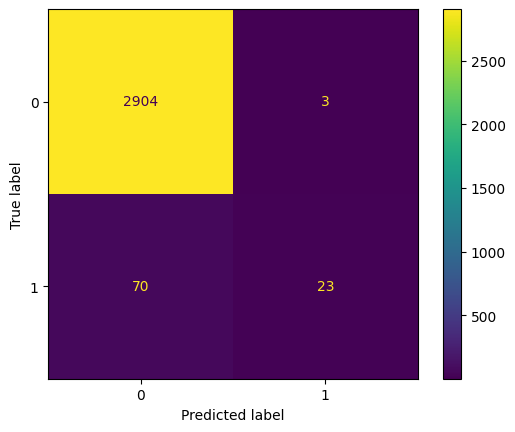


Accuracy: 97.57%

Recall: 24.73%

Precision: 88.46%

F1 Skor: 38.66%


-------------------------------------------------------
k = 7, p = 3



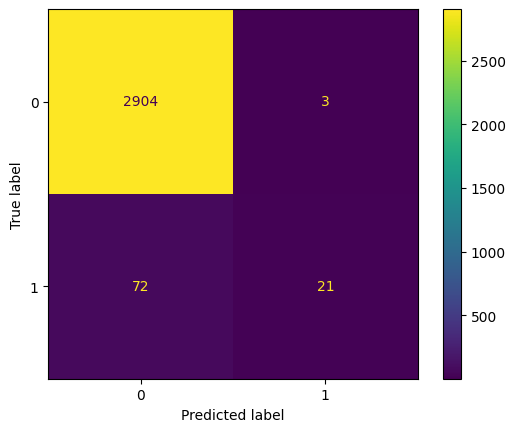


Accuracy: 97.50%

Recall: 22.58%

Precision: 87.50%

F1 Skor: 35.90%


-------------------------------------------------------
k = 9, p = 1



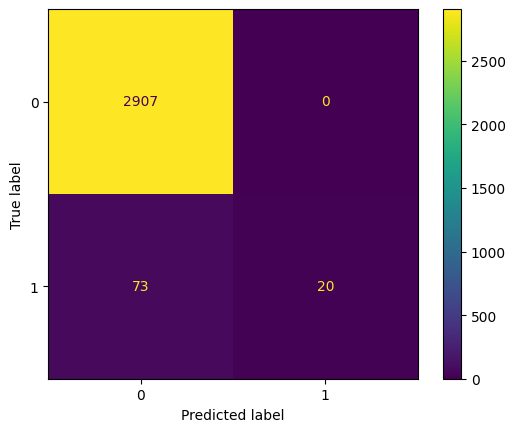


Accuracy: 97.57%

Recall: 21.51%

Precision: 100.00%

F1 Skor: 35.40%


-------------------------------------------------------
k = 9, p = 2



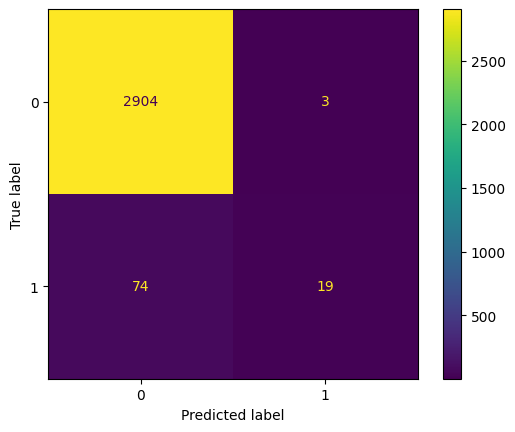


Accuracy: 97.43%

Recall: 20.43%

Precision: 86.36%

F1 Skor: 33.04%


-------------------------------------------------------
k = 9, p = 3



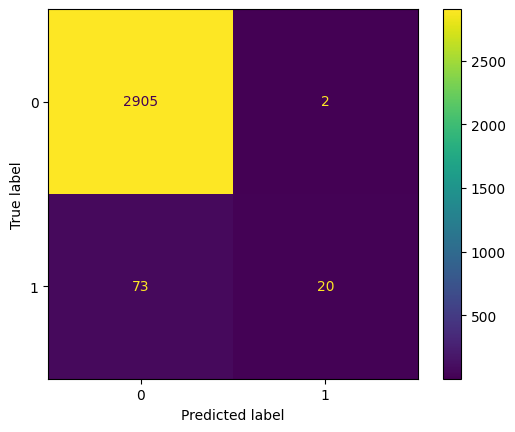


Accuracy: 97.50%

Recall: 21.51%

Precision: 90.91%

F1 Skor: 34.78%



In [161]:
for n_neighbor in n_neighbors:
  for p_number in p_numbers:
    run_model(X_train, y_train, X_test, y_test, n_neighbor, p_number)

In [162]:
model_performance.sort_values("F1-Score", ascending=False)

,Accuracy,Recall,Precision,F1-Score
"k = 3, p = 3",0.978333,0.408602,0.791667,0.539007
"k = 3, p = 1",0.978667,0.397849,0.822222,0.536232
"k = 3, p = 2",0.978333,0.397849,0.804348,0.532374
"k = 1, p = 2",0.971333,0.483871,0.542169,0.511364
"k = 1, p = 3",0.971000,0.473118,0.536585,0.502857
"k = 1, p = 1",0.970667,0.462366,0.530864,0.494253
"k = 5, p = 3",0.977333,0.322581,0.857143,0.468750
"k = 5, p = 2",0.976667,0.311828,0.828571,0.453125
"k = 5, p = 1",0.976333,0.311828,0.805556,0.449612
"k = 7, p = 1",0.977333,0.290323,0.931034,0.442623


Bu sonuçlara göre 0.53 ile en iyi model 3 komşuluk için p = 3 ile hesaplanan uzaklığa göre bulunmuştur.

Kaggle'da yapılmış örneğe göre ek sütun eklenmesi başarıyı arttırmıştır.

In [163]:
dataset['Power'] = dataset['Rotational speed'] * dataset['Torque']
dataset['Power wear'] = dataset['Power'] * dataset['Tool wear']
dataset['Temperature difference'] = dataset['Process temperature'] - dataset['Air temperature']
dataset['Temperature power'] = dataset['Temperature difference'] / dataset['Power']
dataset.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,Type_L,Type_M,Power,Power wear,Temperature difference,Temperature power
0,298.1,308.6,1551,42.8,0,0,0,1,66382.8,0.0,10.5,0.000158
1,298.2,308.7,1408,46.3,3,0,1,0,65190.4,195571.2,10.5,0.000161
2,298.1,308.5,1498,49.4,5,0,1,0,74001.2,370006.0,10.4,0.000141
3,298.2,308.6,1433,39.5,7,0,1,0,56603.5,396224.5,10.4,0.000184
4,298.2,308.7,1408,40.0,9,0,1,0,56320.0,506880.0,10.5,0.000186



-------------------------------------------------------
k = 3, p = 3



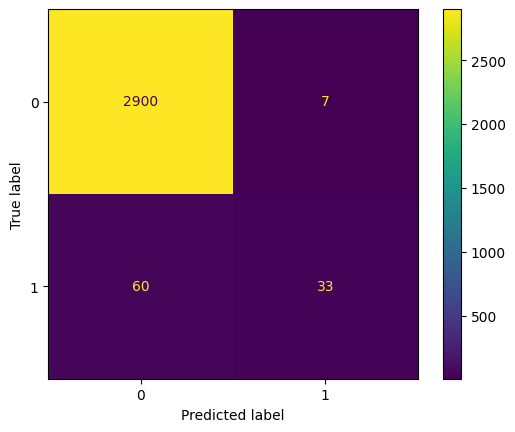


Accuracy: 97.77%

Recall: 35.48%

Precision: 82.50%

F1 Skor: 49.62%



,Accuracy,Recall,Precision,F1-Score
"k = 3, p = 3",0.978333,0.408602,0.791667,0.539007
"k = 3, p = 1",0.978667,0.397849,0.822222,0.536232
"k = 3, p = 2",0.978333,0.397849,0.804348,0.532374
"k = 1, p = 2",0.971333,0.483871,0.542169,0.511364
"k = 1, p = 3",0.971000,0.473118,0.536585,0.502857
"New k = 3, p = 3",0.977667,0.354839,0.825000,0.496241
"k = 1, p = 1",0.970667,0.462366,0.530864,0.494253
"k = 5, p = 3",0.977333,0.322581,0.857143,0.468750
"k = 5, p = 2",0.976667,0.311828,0.828571,0.453125
"k = 5, p = 1",0.976333,0.311828,0.805556,0.449612


In [164]:
y = dataset['Machine failure']
X = dataset.drop(['Machine failure'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
run_model(X_train, y_train, X_test, y_test, 3, 3, prefix="New ")
model_performance.sort_values("F1-Score", ascending=False)

Kaggle'daki örnekteki yeni featureler eklendiğinde F1 skor yükselmemiş hatta 0.53'den 0.49'a düşmüştür.


-------------------------------------------------------
k = 3, p = 3



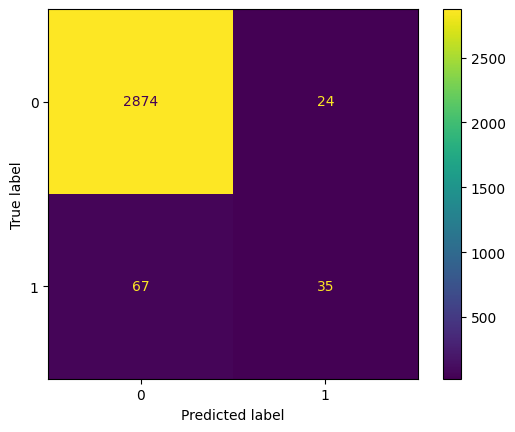


Accuracy: 96.97%

Recall: 34.31%

Precision: 59.32%

F1 Skor: 43.48%



,Accuracy,Recall,Precision,F1-Score
"k = 3, p = 3",0.978333,0.408602,0.791667,0.539007
"k = 3, p = 1",0.978667,0.397849,0.822222,0.536232
"k = 3, p = 2",0.978333,0.397849,0.804348,0.532374
"k = 1, p = 2",0.971333,0.483871,0.542169,0.511364
"k = 1, p = 3",0.971000,0.473118,0.536585,0.502857
"New k = 3, p = 3",0.977667,0.354839,0.825000,0.496241
"k = 1, p = 1",0.970667,0.462366,0.530864,0.494253
"k = 5, p = 3",0.977333,0.322581,0.857143,0.468750
"k = 5, p = 2",0.976667,0.311828,0.828571,0.453125
"k = 5, p = 1",0.976333,0.311828,0.805556,0.449612


In [165]:
y = dataset['Machine failure']
X = dataset.drop(['Machine failure'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
run_model(X_train, y_train, X_test, y_test, 3, 3, prefix="Stratify ")
model_performance.sort_values("F1-Score", ascending=False)

Burada testtrain test split yapılırken stratify=y verilmiştir ve sonuç 0.49'dan 0.43'e düşmüştür.